In [1]:
import sqlite3
import pandas

In [2]:
pandas.set_option('display.max_rows', 400)

'Dataset orthologs_hemoglobin_beta optimized value is 0.0 after 166 runs'

'Dataset orthologs_myoglobin optimized value is 0.0 after 91 runs'

'Dataset orthologs_neuroglobin optimized value is 0.0 after 82 runs'

'Dataset orthologs_cytoglobin optimized value is 0.583 after 106 runs'

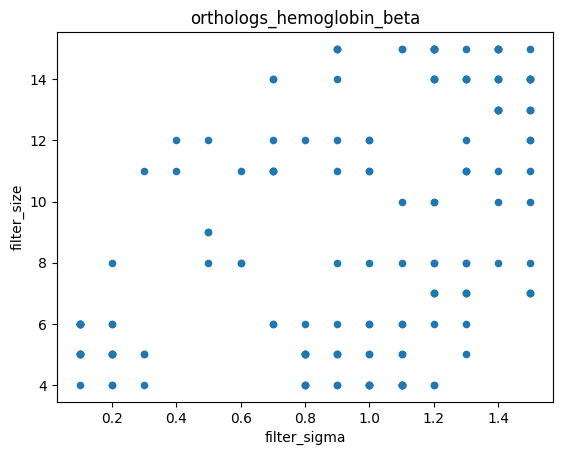

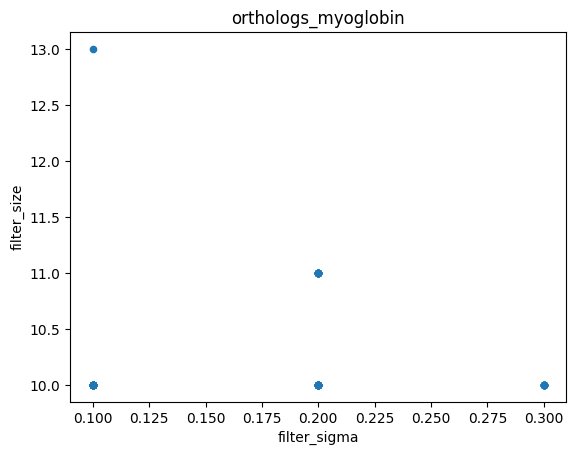

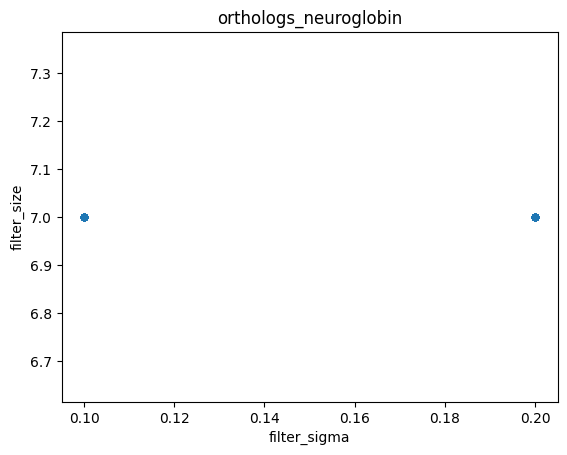

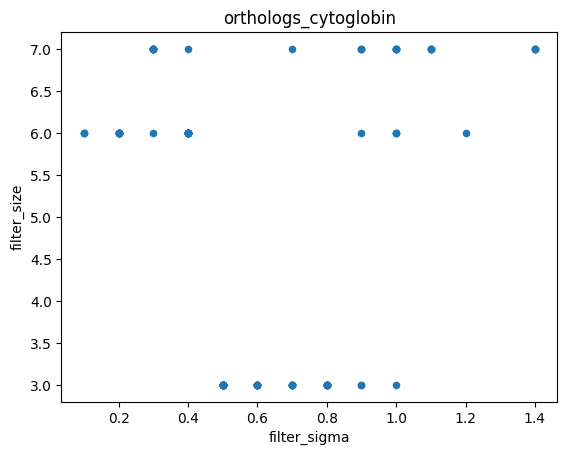

In [3]:
datasets = ["orthologs_hemoglobin_beta", "orthologs_myoglobin", "orthologs_neuroglobin", "orthologs_cytoglobin"]
dfs = []
for data in datasets:
    cnx = sqlite3.connect(f"../../../data/{data}.db")
    df = pandas.read_sql_query("""
        SELECT p.trial_id, p.param_name as param, ROUND(p.param_value, 2) as p_value, value FROM
        trial_values as v JOIN trial_params as p ON v.trial_id = p.trial_id
        WHERE value = ( SELECT MIN(value) FROM trial_values );""", cnx)
    min_value = df["value"][0]
    df_groups = df[["trial_id", "param", "p_value"]].groupby(["trial_id", "param", "p_value"]).count()
    df_normalized = df_groups.reset_index().pivot(index="trial_id", columns="param").reset_index()
    df_normalized.p_value.plot(x="filter_sigma", y="filter_size", title=data, kind="scatter")
    display(f"Dataset {data} optimized value is {round(min_value, 3)} after {df_normalized.shape[0]} runs")
    dfs.append(df_normalized.p_value)

In [4]:
cols = ["filter_sigma", "filter_size"]

df_m1 = pandas.merge(dfs[0][cols], dfs[1][cols], how="inner", on=cols)
df_m2 = pandas.merge(df_m1, dfs[2][cols], how="inner", on=cols)
df_all = df_m2.drop_duplicates()
df_all.describe()

param,filter_sigma,filter_size
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


<AxesSubplot: title={'center': 'Intersections'}, xlabel='filter_sigma', ylabel='filter_size'>

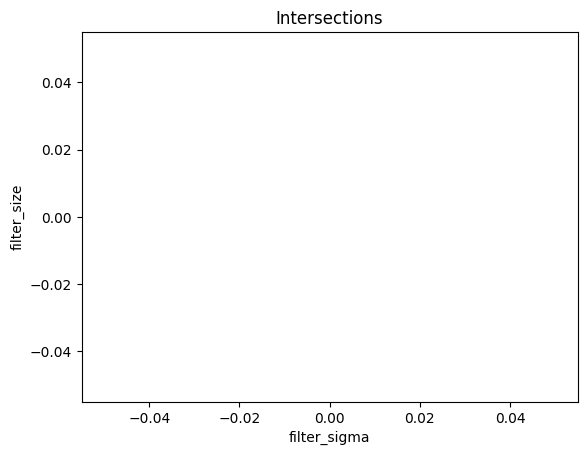

In [5]:
df_all.plot(x="filter_sigma", y="filter_size", title="Intersections", kind="scatter")